# Statistics and Machine Learning Research

## Relative frequency for categorical variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

data = {
    "freq": [125, 98, 113]
}

df = pd.DataFrame(data, index=["Audi", "BMW", "Mercedes"] )
df['relative_freq'] = df["freq"] / df["freq"].sum() * 100
df = df.sort_values(by='relative_freq',ascending=False)
df['cum_frequency'] = df['relative_freq'].cumsum()
df.head()

,freq,relative_freq,cum_frequency
Audi,125,37.202381,37.202381
Mercedes,113,33.630952,70.833333
BMW,98,29.166667,100.000000


## Covariance

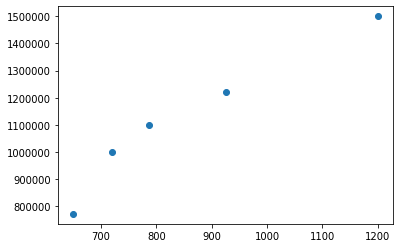

In [3]:
data = {
    "size": [650, 786, 1200, 720, 925],
    "price": [772000, 1100000, 1500000, 1000000, 1220000]
}

df = pd.DataFrame(data)

df.cov() # Covarience
df.corr() # Compute pairwise correlation of columns, excluding NA/null values.

plt.plot(df['size'], df['price'], 'o')

## Standard desviation and coefficient of variation

In [6]:
from scipy.stats import variation, pearsonr

usd = [ 
1.00 ,
2.00 ,
3.00 ,
3.00 ,
5.00 ,
6.00 ,
7.00 ,
8.00 ,
9.00 ,
11.00,
]

pesos = [ 
18.81 ,
37.62 ,
56.43 ,
56.43 ,
94.05 ,
112.86 ,
131.67 ,
150.48 ,
169.29 ,
206.91 ,
]

df = pd.DataFrame({
    "mean": [np.mean(usd), np.mean(pesos)],
    "variance": [np.var(usd), np.var(pesos)],
    "std": [np.std(usd), np.std(pesos)],
    "variation": [variation(usd), variation(pesos)],
    "correlation": [pearsonr(usd, pesos), pearsonr(pesos, usd)]
})

df.head()

,mean,variance,std,variation,correlation
0,5.500,9.650000,3.106445,0.564808,"(1.0, 0.0)"
1,103.455,3414.325365,58.432229,0.564808,"(1.0, 0.0)"


## Linear Regresion

In [4]:
import statsmodels.api as sm
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
sns.set() # Disable matplotlib styles and use the seaborn styles

In [5]:
data = pd.read_csv('1.01. Simple linear regression.csv') 

data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


### Stats details

In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Define the indepent and depend variables

In [7]:
y = data['GPA']
x1 = data['SAT']

### Explore data

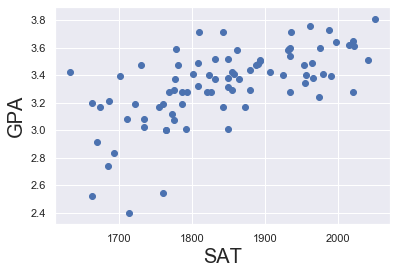

In [8]:
plt.scatter(x1, y)

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

### Regresion itself

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

C:\Users\MH916XG\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           7.20e-11
Time:                        15:59:42   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

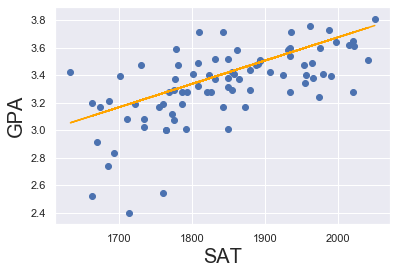

In [10]:
plt.scatter(x1, y)
yhat = 0.0017 * x1 + 0.2750 # SAT COEF + x1 (Array of SAT VALUES) + 0.2750 Constant
plt.plot(x1, yhat, c="orange")
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Real State Linear Regresion (Exercice)

### Define indepent and depent variables and exploring data

In [11]:
real_state_data = pd.read_csv('real_estate_price_size.csv')

real_state_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


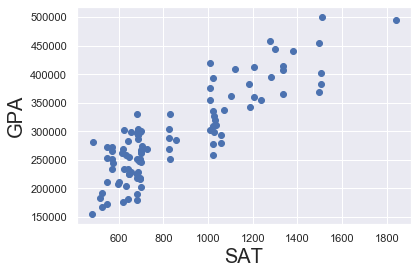

In [12]:
y = real_state_data['price']
x1 = real_state_data['size']

plt.scatter(x1, y)

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

### Regresion itself

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           8.13e-31
Time:                        15:59:42   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

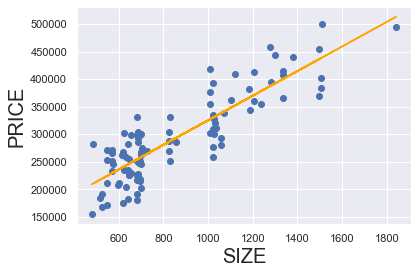

In [14]:
plt.scatter(x1, y)
y_prediction = 223.1787 * x1 + 1.019e+05 #  COEF QUE CUANTIFICA + x1 (Array of Sizes VALUES) + 1.019e+05 Constant
plt.plot(x1, y_prediction, c="orange")
plt.xlabel('SIZE', fontsize=20)
plt.ylabel('PRICE', fontsize=20)
plt.show()

## Multiple Linear Regresion

In [15]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [16]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Create the multiple regresion itself

In [17]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           6.58e-10
Time:                        15:59:42   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
data = pd.read_csv('real_estate_price_size_year.csv')

y = data['price']
x1 = data[['size', 'year']]

x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.77e-32
Time:                        15:59:42   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical Variables (Dummies)

In [19]:
raw_data = pd.read_csv('1.03. Dummies.csv')

data = raw_data.copy()

data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [20]:
data.describe() # 46 % Han asistido

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [21]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.19e-15
Time:                        15:59:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'GPA')

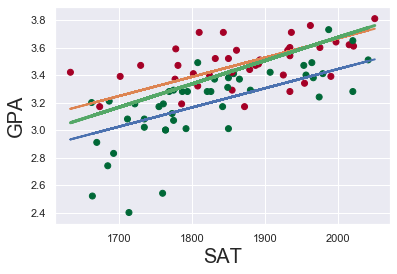

In [23]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.0017 * data['SAT'] + 0.2750 # La del modelo viejo
fig = plt.plot(data['SAT'], yhat_no, lw=2)
fig = plt.plot(data['SAT'], yhat_yes, lw=2)
fig = plt.plot(data['SAT'], yhat, lw=3)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

### Do a prediction for this multivariable model

In [24]:
new_data = pd.DataFrame({
    'const': 1, 'SAT': [1700, 1670], 'Attendance':[0, 1]
})

new_data = new_data[['const', 'SAT', 'Attendance']]

new_data.rename(index={0: 'Bob', 1: 'Alice'})

predictions = results.predict(new_data)

predictiondf = pd.DataFrame({'Predictions': predictions})

joined = new_data.join(predictiondf)

joined.rename(index={0: 'Bob', 1: 'Alice'})

joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


## Logistic Regression

0 o 1, Yes o Not, Categorical not numeric

In [25]:
data = pd.read_csv('Example-bank-data.csv')

data.tail()

,Unnamed: 0,duration,y
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes
517,517,142,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [26]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
y = data['y']
x1 = data['duration']
data.head()

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0


In [27]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.2121
Time:                        15:59:43   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

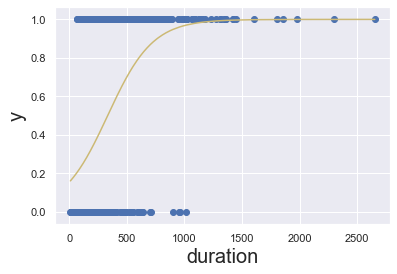

In [28]:
# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('duration', fontsize = 20)
plt.ylabel('y', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### Binary Predictors in Logistic Regressions

In [29]:
data = pd.read_csv('2.02. Binary predictors.csv')

data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [30]:
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [31]:
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [32]:
y = data['Admitted']
x1 = data[['Gender', 'SAT']]

In [33]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.8249
Time:                        15:59:43   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Calculating the precision of the model

Using a confusion matrix

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict() # Y Values predictions

NameError: name 'results_log' is not defined

In [8]:
np.array(data['Admitted']) # Real Values

KeyError: 'Admitted'

In [36]:
mc = pd.DataFrame(results_log.pred_table())
mc.columns = ['Predicted 0', 'Predicted 1']
mc = mc.rename(index={0:"Actual 0", 1:"Actual 1"})
mc

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


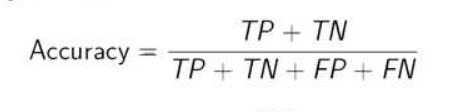

In [37]:
cm_array = np.array(mc)
accuracy_train = (cm_array[0, 0]+cm_array[1, 1])/cm_array.sum()
print(accuracy_train)

0.9464285714285714


### Fitting the model with training data and testing it with test data (data split)

In [38]:
data = pd.read_csv('2.03. Test dataset.csv')

In [39]:
data.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [40]:
test = data.copy()
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})

In [41]:
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


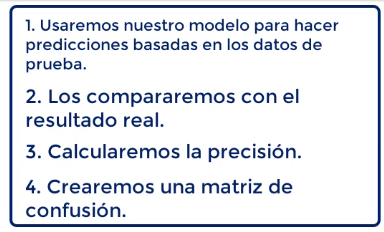

In [42]:
x

,const,Gender,SAT
0,1.0,0,1363
1,1.0,1,1792
2,1.0,1,1954
3,1.0,0,1653
4,1.0,0,1593
...,...,...,...
163,1.0,1,1722
164,1.0,0,1750
165,1.0,0,1555
166,1.0,0,1524


### Reorder so that the coefficients do not affect the true result

In [43]:
cols = list(x.columns)
a, b = cols.index('Gender'), cols.index('SAT')
cols[b], cols[a] = cols[a], cols[b]
x = x[cols]
x.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [44]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
test_data.head()

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [45]:
def matrix_confusion(data, actual_values, model):
    pred_values = model.predict(data)
    bins=np.array([0, 0.5, 1])
    cm= np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0, 0]+cm[1, 1])/cm.sum()
    return cm, accuracy

In [46]:
cm = matrix_confusion(test_data, test_actual, results_log)
cm

(array([[0.00, 6.00],
        [0.00, 13.00]]), 0.6842105263157895)

# Clustering

### K means

In [47]:
data = pd.read_csv('3.01. Country clusters.csv')
copy = data.copy()

In [48]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(*args, **kw)>

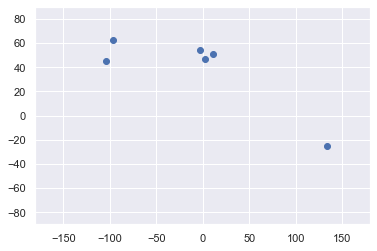

In [49]:
from sklearn.cluster import KMeans

plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

In [50]:
x = data.iloc[:, 1:3] # Only latitude and longitude

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [51]:
kmeans=KMeans(3) # 3 k (3 Groups)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [52]:
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([2, 2, 0, 0, 0, 1])

In [53]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

In [54]:
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(*args, **kw)>

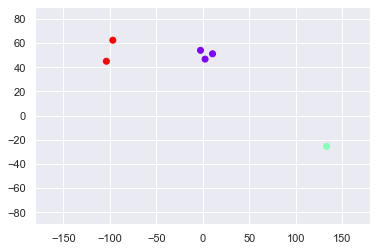

In [55]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

### Clustering with categorical variables

In [9]:
copy = data.copy()
copy['Language'] = copy['Language'].map({'English': 0, 'French': 1, 'German': 2})
x = copy.iloc[:, 3:4]
kmeans=KMeans(3) # 3 Groups
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

KeyError: 'Language'

### Selectig the number of clusters

#### WCSS:

In [57]:
WCSS = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
print(WCSS) # Cluster-Sum-of-Squares 

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]


C:\Users\MH916XG\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\MH916XG\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\MH916XG\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


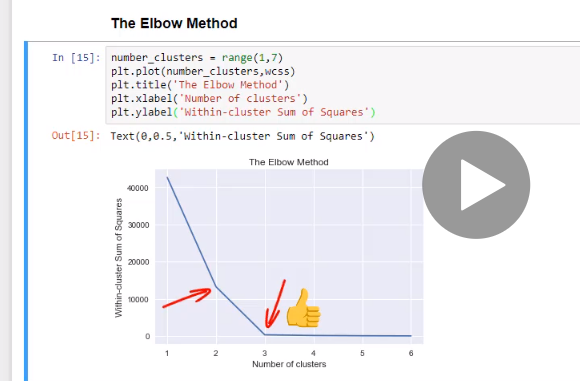

### Disadvantages of K-Means:

- A K must be defined (It is not practical for unsupervised learning)
- Sensitive to initialization but this is solved by -> k-means ++
- Sensitive to typical values -> Clear data and remove outliers

## Market segmentation using K means ++ (Exercice)

In [58]:
data = pd.read_csv('3.12. Example.csv')

In [59]:
data_copy = data.copy()

data_copy.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


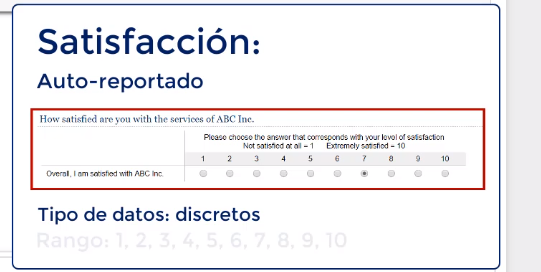

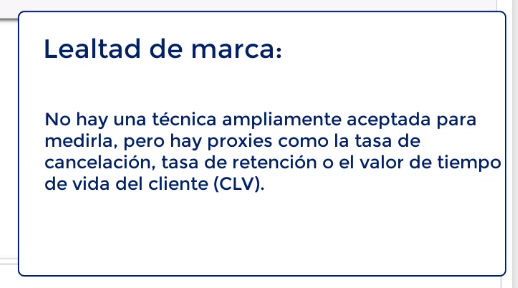

Text(0.5, 0, 'Loyalty')

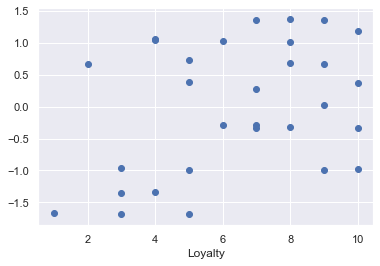

In [60]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.xlabel('Loyalty')

Text(0.5, 0, 'Loyalty')

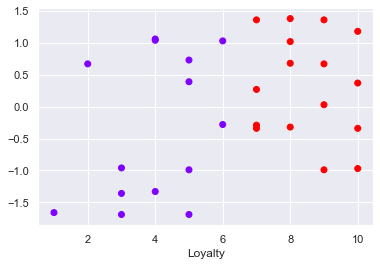

In [61]:
kmeans = KMeans(2)
data_copy['cluster_pred'] = kmeans.fit_predict(data)
plt.scatter(data_copy['Satisfaction'], data_copy['Loyalty'], c=data_copy['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.xlabel('Loyalty')

# Necesitamos estandarizar la satisfacion, porque la lealtad es mucho mas alta.

In [62]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data_copy)

x_scaled

array([[-0.93, -1.33, -1.07],
       [-0.16, -0.28, -1.07],
       [-0.54, -0.99, -1.07],
       [0.23, -0.29, 0.94],
       [-0.93, 1.06, -1.07],
       [-2.10, -1.66, -1.07],
       [1.40, -0.97, 0.94],
       [0.62, -0.32, 0.94],
       [0.62, 1.02, 0.94],
       [0.62, 0.68, 0.94],
       [1.40, -0.34, 0.94],
       [-0.54, 0.39, -1.07],
       [-0.54, -1.69, -1.07],
       [-1.71, 0.67, -1.07],
       [0.23, 0.27, 0.94],
       [1.01, 1.36, 0.94],
       [0.62, 1.38, 0.94],
       [0.23, 1.36, 0.94],
       [0.23, -0.34, 0.94],
       [1.01, 0.67, 0.94],
       [1.40, 1.18, 0.94],
       [-1.32, -1.69, -1.07],
       [-0.93, 1.04, -1.07],
       [-1.32, -0.96, -1.07],
       [-0.16, 1.03, -1.07],
       [1.01, -0.99, 0.94],
       [1.40, 0.37, 0.94],
       [1.01, 0.03, 0.94],
       [-1.32, -1.36, -1.07],
       [-0.54, 0.73, -1.07]])

# Elbow method to know the perfect k parameter

Text(0.5, 0, 'Number of k, cluster, grupos')

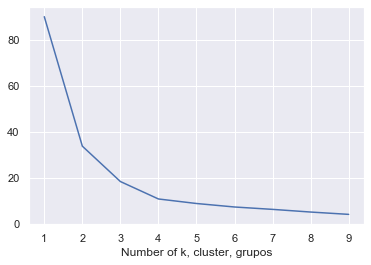

In [63]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of k, cluster, grupos') 

Text(0.5, 0, 'Loyalty')

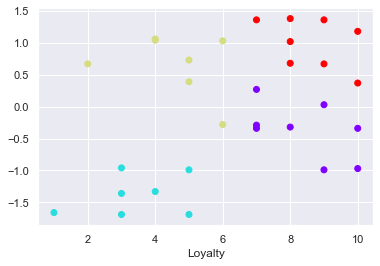

In [64]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = data_copy.copy()
clusters_new['cluster_pred'] = kmeans_new.predict(x_scaled)

plt.scatter(data_copy['Satisfaction'], data_copy['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.xlabel('Loyalty')

# Iris Dataset with Kmeans ++


In [65]:
data = pd.read_csv('iris-dataset.csv')

### Exploration

In [66]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


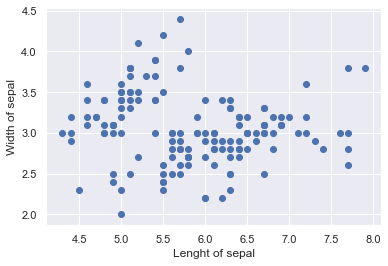

In [67]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

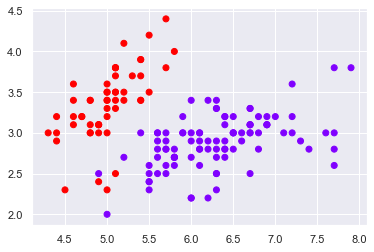

In [68]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

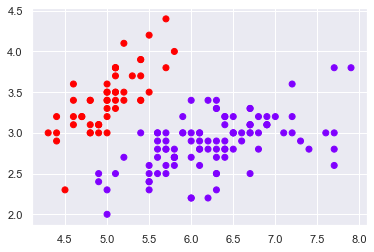

In [69]:
x_scaled = preprocessing.scale(data)
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)
clusters['cluster_pred_standarized'] = kmeans_scaled.predict(x_scaled)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['cluster_pred_standarized'], cmap = 'rainbow')

In [70]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.61353859563565,
 91.15436807797663,
 80.23060704506958,
 71.89126885990231,
 62.853198739591576,
 54.31165069606419]

### Elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

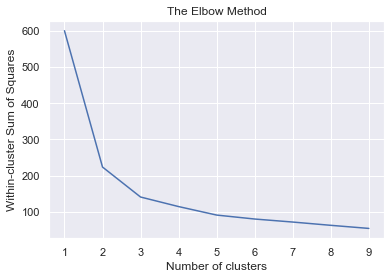

In [71]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

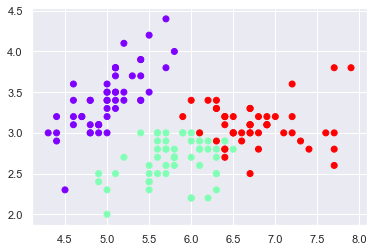

In [72]:
x_scaled = preprocessing.scale(data)
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
clusters['cluster_pred_standarized'] = kmeans_scaled.predict(x_scaled)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['cluster_pred_standarized'], cmap = 'rainbow')

# Dendogram

In [73]:
data = pd.read_csv('Country clusters standardized.csv', index_col='Country')
copy = data.copy()
copy = copy.drop(['Language'], axis=1)

copy

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


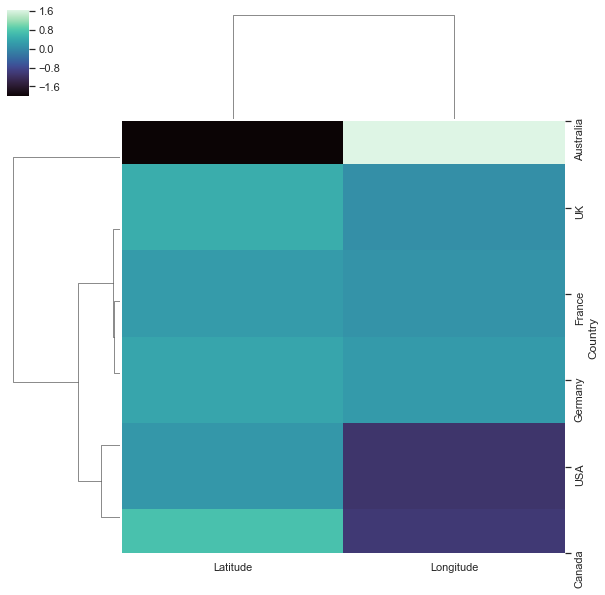

In [74]:
sns.clustermap(copy, cmap='mako')

## Machine Learning

### Lineal Model with multiples inputs

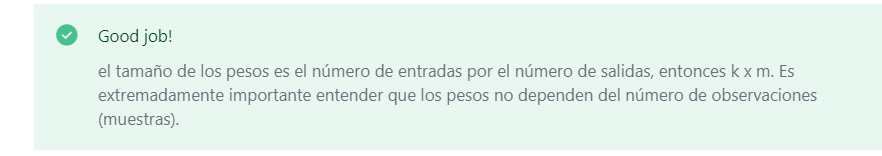

In [75]:
w = np.array([1.2,-3])
b = np.array([7])
x = np.array([2,3])
y = x[0]*w[0] + x[1]*w[1] + b[0]
y

0.40000000000000036

### Gradient descent

In [2]:
from sympy.abc import x
import sympy as sym 
from IPython.display import display, Math

fx = (5*x**2) + 3*x - 4
first_derivate_of_fx = sym.diff(fx)
x_sub = 4 # numero cualquiera
eta = 0.01
display(Math(sym.latex('\eta = %g'%eta)))
print('------------')
for i in range(0, 90):
    function_resolved = first_derivate_of_fx.subs({x: x_sub}).evalf()
    display(Math(sym.latex('x_{%g}=%g'%(i, x_sub))))
    display(Math(sym.latex("x_{%g}=x_%g - \eta * f'(x_{%g})" % (i+ 1, i, i))))
    x_sub = x_sub - eta * function_resolved
    display(Math(sym.latex("x_{%g}=%g"%(i + 1, x_sub))))
    display(Math(sym.latex("f'(x_{%g})=%g"%(i, function_resolved))))
    print('---------------')


<IPython.core.display.Math object>

------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------


### Neural networks and linear regressions

In [146]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random input data to drain

observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) 

# Create the targets we will aim at

noise = np.random.uniform(-1, 1, (observations,1))
targets = 2*xs - 3*zs + 5 + noise # Targe shape : 1000x1

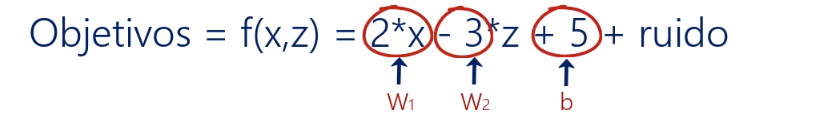

### Initialize Hiperparameters and parameters

In [11]:
init_range = 0.1 # Hiperparameter
weights = np.random.uniform(-init_range, init_range, size=(2, 1)) # parameter 
biases= np.random.uniform(-init_range, init_range, size=1) # parameter
learning_rate = 0.02 # Hiperparameter
outputs = None

### Training model

In [12]:
for i in range(200):
    outputs = np.dot(inputs, weights) + biases <- y = xw+b
    deltas = outputs - targets 
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations 
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

SyntaxError: can't assign to comparison (<ipython-input-12-b4727511ea46>, line 3)

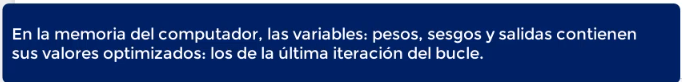

In [151]:
print(weights, biases)

[[1.99]
 [-2.97]] [0.40]


Text(0, 0.5, 'targets')

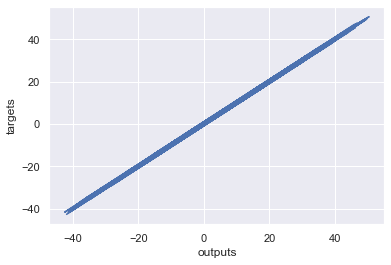

In [160]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

## Tensorflow 2

In [37]:
import tensorflow as tf
import numpy as np 


# data generation
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs, zs)) 
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise # Shape : 1000x1
# save npz with the data
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [38]:
# solving with tf
training_data = np.load('TF_intro.npz')
input_size=2
output_size = 2
# model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        output_size,
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(
    optimizer=custom_optimizer,
    loss='mean_squared_error'
)
model.fit(
    training_data['inputs'],
    training_data['targets'],
    epochs=100, # iteraciones
    verbose=0
)

In [39]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
weights, bias

(array([[ 1.999073 ,  1.999073 ],
        [-3.0108924, -3.0108924]], dtype=float32),
 array([5.01519, 5.01519], dtype=float32))

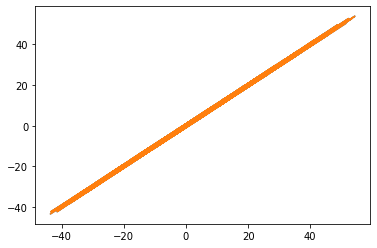

In [40]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))

## Deep Neural Network: MNIST (Exercice)

In [1]:
import numpy as np
import tensorflow_datasets as tfds

print(tfds)

<module 'tensorflow_datasets' from 'C:\\Users\\MH916XG\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_datasets\\__init__.py'>


In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

Shuffling and writing examples to C:\Users\MH916XG\tensorflow_datasets\mnist\3.0.1.incomplete44ZB00\mnist-train.tfrecord


Shuffling and writing examples to C:\Users\MH916XG\tensorflow_datasets\mnist\3.0.1.incomplete44ZB00\mnist-test.tfrecord


Dataset mnist downloaded and prepared to C:\Users\MH916XG\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
mnist_dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [4]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [20]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples) 

BATCH_SIZE = 100 # Hiperparameter

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### Structure Model with tensorflow

In [26]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # La salida debe ser probabilidad
])

### Optimizer and loss function

In [27]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

### Training

In [28]:
NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
540/540 - 4s - loss: 0.3394 - accuracy: 0.9030 - val_loss: 0.1685 - val_accuracy: 0.9543
Epoch 2/5
540/540 - 4s - loss: 0.1414 - accuracy: 0.9584 - val_loss: 0.1211 - val_accuracy: 0.9648
Epoch 3/5
540/540 - 3s - loss: 0.0986 - accuracy: 0.9702 - val_loss: 0.0919 - val_accuracy: 0.9732
Epoch 4/5
540/540 - 3s - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 5/5
540/540 - 3s - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0660 - val_accuracy: 0.9810


### Test model

In [29]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.97 - 0s 7ms/step - loss: 0.0829 - accuracy: 0.9735


In [30]:
print('TEST LOSS',test_loss )

TEST LOSS 0.0828947126865387


In [34]:
print('TEST ACCURACY',test_accuracy*100, '%' )

TEST ACCURACY 97.35000133514404 %


### Predict the number of a single image

In [79]:
image = tf.keras.preprocessing.image.load_img(
    'number_7.png', 
    color_mode='grayscale', target_size=(28, 28)
)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = img_array.reshape(1, 28, 28, 1)
img_array = tf.cast(img_array, tf.float32)
img_array /= 255.0
prediction = model.predict(img_array, verbose=2)
number_predicted = np.argmax(prediction, axis=-1)[0] # Busca el item maximo en el array que sera el indice 7 con ~0.9
print('Number predicted {}'.format(argmax))

1/1 - 0s
Number predicted 7


## Deep Neural Network: Customers will Buy or Not (Exercice)

In [1]:
import numpy as np
from sklearn import preprocessing

raw_csv_data = np.loadtxt('Audiobooks_data.csv', delimiter = ",")
unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1]

### Data pre-processing

In [25]:
# Balance the dataset

# Zeros and Ones have the same quantity 50% and 50%

num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)

# Standarized values

scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

# Shuffle dataset
# # Take indices from scaled_inputs (data) and put in a variable
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)
# # Create Inputs and Target Suffled arrays
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

# Split data, Train, Validation, Test

samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

# 80 %
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# 10 %
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# 10 %
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
 
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)

print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

# Save data in a friendly format for tensors (.npz)

np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

1811.0 3579 0.50600726459905
214.0 447 0.47874720357941836
212.0 448 0.4732142857142857


### Get data from NPZ files

In [26]:
import numpy as np
import tensorflow as tf

npz = np.load('Audiobooks_data_train.npz')

train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_validation.npz')

validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_test.npz')

test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

### Structure the model

Outline, optimizers, loss, stopping and training

In [28]:
input_size = 10
output_size = 12
hidden_layer_size = 50
batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # 0 o 1
])

model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.fit(
    train_inputs, 
    train_targets, 
    batch_size=batch_size, 
    epochs=max_epochs,
    callbacks=[early_stopping],
    validation_data=(validation_inputs, validation_targets),
    verbose=2
)


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

### Test the trained model

In [29]:
test, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 859us/step - loss: 0.2762 - accuracy: 0.8951
